SVR (Raw 5x5):
  MSE: 19266.82222339978
  R² : 0.33604022413438517


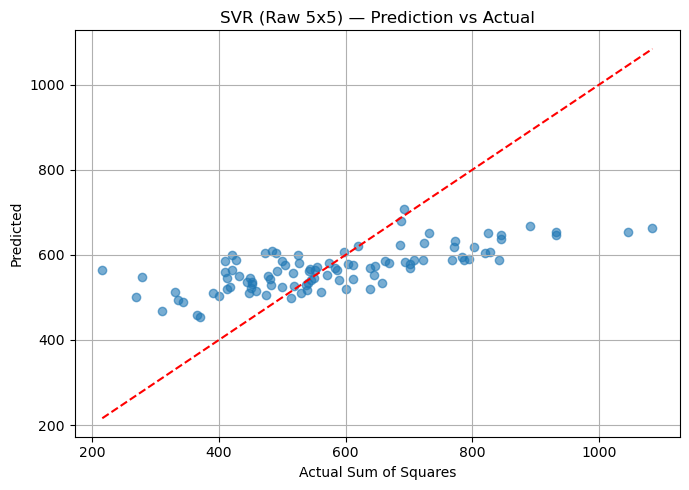

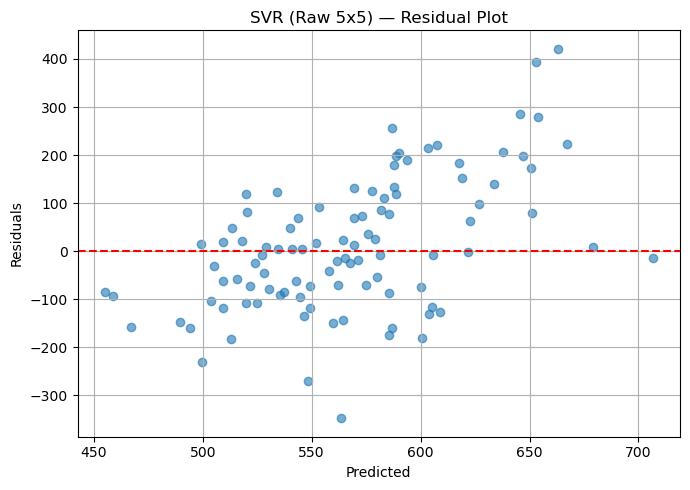

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

train_df = pd.read_csv("train_5x5_eigen_data.csv")
test_df = pd.read_csv("test_5x5_eigen_data.csv")

feature_cols = list("abcdefghijklmnopqrstuvwxy")
X_train = train_df[feature_cols]
y_train = train_df["sum_squared"]
X_test = test_df[feature_cols]
y_true = test_df["sum_squared"]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)

print("SVR (Raw 5x5):")
print("  MSE:", mean_squared_error(y_true, y_pred))
print("  R² :", r2_score(y_true, y_pred))

plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("SVR (Raw 5x5) — Prediction vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

residuals = y_true - y_pred
plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("SVR (Raw 5x5) — Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


SVR (Featured 5x5)
  MSE: 12956.294169337758
  R² : 0.5535092360859237


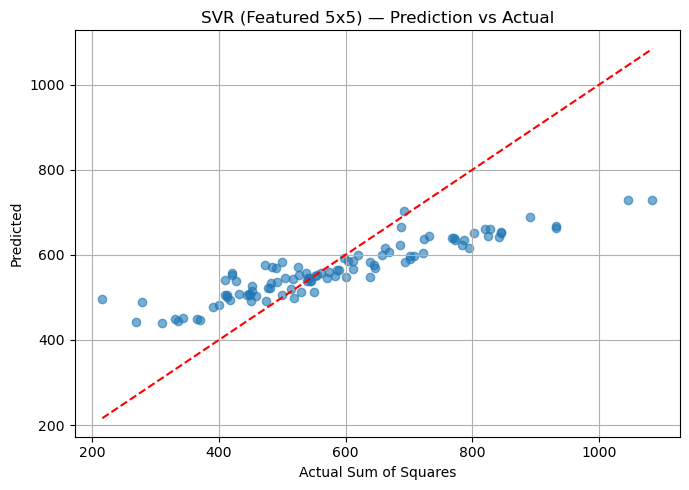

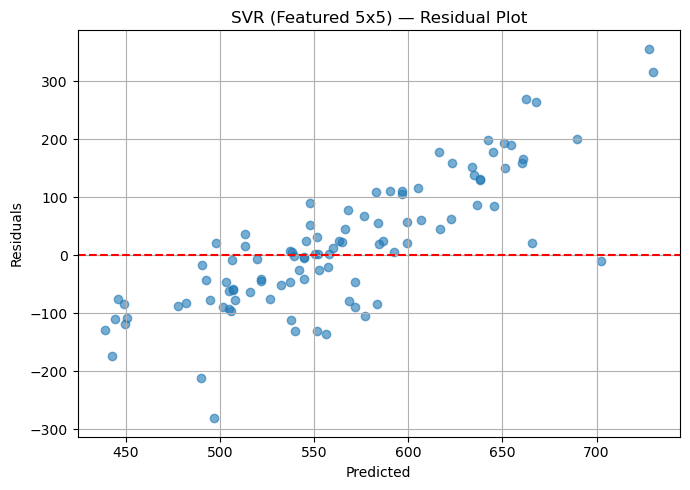

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

train_df = pd.read_csv("train_5x5_eigen_data.csv")
test_df = pd.read_csv("test_5x5_eigen_data.csv")

def add_features(df):
    df['trace'] = df['a'] + df['g'] + df['m'] + df['s'] + df['y']

    def symmetry_score(row):
        mat = np.array([
            [row['a'], row['b'], row['c'], row['d'], row['e']],
            [row['f'], row['g'], row['h'], row['i'], row['j']],
            [row['k'], row['l'], row['m'], row['n'], row['o']],
            [row['p'], row['q'], row['r'], row['s'], row['t']],
            [row['u'], row['v'], row['w'], row['x'], row['y']]
        ])
        return np.sum(np.abs(mat - mat.T))

    def matrix_det(row):
        mat = np.array([
            [row['a'], row['b'], row['c'], row['d'], row['e']],
            [row['f'], row['g'], row['h'], row['i'], row['j']],
            [row['k'], row['l'], row['m'], row['n'], row['o']],
            [row['p'], row['q'], row['r'], row['s'], row['t']],
            [row['u'], row['v'], row['w'], row['x'], row['y']]
        ])
        return np.linalg.det(mat)

    df['sym_score'] = df.apply(symmetry_score, axis=1)
    df['det'] = df.apply(matrix_det, axis=1)
    return df

train_df = add_features(train_df)
test_df = add_features(test_df)

feature_cols = list("abcdefghijklmnopqrstuvwxy") + ['trace', 'sym_score', 'det']
X_train = train_df[feature_cols]
y_train = train_df["sum_squared"]
X_test = test_df[feature_cols]
y_true = test_df["sum_squared"]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)

print("SVR (Featured 5x5)")
print("  MSE:", mean_squared_error(y_true, y_pred))
print("  R² :", r2_score(y_true, y_pred))

plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("SVR (Featured 5x5) — Prediction vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

residuals = y_true - y_pred
plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("SVR (Featured 5x5) — Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()
